# Face Emotion Recognition Project

This project focuses on **Face Emotion Recognition** using the [FER2013 dataset](https://www.kaggle.com/datasets/msambare/fer2013) from Kaggle. The goal is to develop a machine learning model that can accurately classify human facial expressions into distinct emotion categories based on image data.

## Dataset Overview

- **Source:** Kaggle ([FER2013 dataset](https://www.kaggle.com/datasets/msambare/fer2013))
- **Description:** The dataset contains grayscale images of faces, each labeled with one of several emotion categories such as *angry*, *disgust*, *fear*, *happy*, *sad*, *surprise*, and *neutral*.

## Objectives

- Explore and preprocess the FER2013 dataset.
- Build and train a deep learning model for emotion classification.
- Evaluate model performance and visualize results.

---

This notebook documents the workflow, from data exploration to model evaluation, for the Face Emotion Recognition task.

In [ ]:
Here are some suggestions for what you could code in the next cell:

1. **Import necessary libraries**  
    (e.g., numpy, pandas, matplotlib, tensorflow/keras, etc.)

2. **Load the FER2013 dataset**  
    (from a CSV file or other source)

3. **Display basic information about the dataset**  
    (e.g., shape, columns, sample rows)

4. **Visualize some sample images from the dataset**  
    (to understand the data)

5. **Check for missing values or data issues**

Choose one of these steps to proceed with your project.

## Data Preparation and Augmentation

To prepare the FER2013 dataset for training and evaluation, we use Keras' `ImageDataGenerator` for image preprocessing and augmentation. This helps improve model generalization by generating diverse training samples.

- **Directories:**  
    - `train_dir`: Directory containing training images, organized by emotion class.
    - `test_dir`: Directory containing test images, organized similarly.

- **ImageDataGenerator:**  
    - For training, images are rescaled to [0, 1] and augmented with random rotations, shifts, shearing, zoom, and horizontal flips.
    - For testing, images are only rescaled.

- **Data Generators:**  
    - `train_generator`: Loads and augments grayscale images from the training directory, outputs batches of 64 images with categorical labels.
    - `test_generator`: Loads grayscale images from the test directory for evaluation.

This setup ensures the model receives a variety of training samples and that evaluation is performed on unaugmented, normalized images.

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'train'
test_dir = 'test'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Model Architecture

The convolutional neural network (CNN) model for face emotion recognition is built using Keras' Sequential API. The architecture consists of multiple convolutional, batch normalization, pooling, and dropout layers to extract robust features and prevent overfitting. The final dense layers perform classification based on the extracted features.

**Key components:**
- **Convolutional Layers:** Extract spatial features from input images using filters.
- **Batch Normalization:** Stabilizes and accelerates training by normalizing activations.
- **MaxPooling Layers:** Reduce spatial dimensions and retain important features.
- **Dropout Layers:** Randomly deactivate neurons during training to prevent overfitting.
- **Flatten Layer:** Converts 2D feature maps into a 1D vector.
- **Dense Layers:** Perform high-level reasoning and classification.
- **Output Layer:** Uses softmax activation to output probabilities for each emotion class.

The model is compiled with the Adam optimizer and categorical cross-entropy loss, and its summary is displayed to show the architecture and parameter counts.

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1), padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.4),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.5),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 6,003,143 (22.90 MB)

 Trainable params: 5,999,815 (22.89 MB)

 Non-trainable params: 3,328 (13.00 KB)

## Model Training

The model is trained using the `fit` method with the following setup:

- **Early Stopping:**  
    The `EarlyStopping` callback monitors the validation loss (`val_loss`) and stops training if it does not improve for 5 consecutive epochs. It also restores the best weights observed during training to prevent overfitting.

- **Training Process:**  
    - The model is trained on batches from `train_generator`.
    - Validation is performed on `test_generator`.
    - Training runs for up to 50 epochs, but may stop early due to the early stopping criterion.
    - The training history, including loss and accuracy metrics for both training and validation sets, is stored in the `history` object.

This approach helps optimize model performance while avoiding overfitting.

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=[early_stop]
)

Epoch 1/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 348s 774ms/step - accuracy: 0.5942 - loss: 1.0895 - val_accuracy: 0.5777 - val_loss: 1.1104
Epoch 2/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 1399s 3s/step - accuracy: 0.5910 - loss: 1.0857 - val_accuracy: 0.6211 - val_loss: 0.9993
Epoch 3/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 337s 750ms/step - accuracy: 0.5950 - loss: 1.0796 - val_accuracy: 0.5850 - val_loss: 1.0782
Epoch 4/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 340s 757ms/step - accuracy: 0.5937 - loss: 1.0788 - val_accuracy: 0.6223 - val_loss: 1.0113
Epoch 5/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 343s 763ms/step - accuracy: 0.6027 - loss: 1.0540 - val_accuracy: 0.6237 - val_loss: 0.9919
Epoch 6/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 340s 758ms/step - accuracy: 0.5988 - loss: 1.0563 - val_accuracy: 0.6193 - val_loss: 1.0198
Epoch 7/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 340s 756ms/step - accuracy: 0.6035 - loss: 1.0585 - val_accuracy: 0.6209 - val_loss: 1.0031
Epoch 8/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 399s 889ms/step - accuracy: 0.6061 - l

## Model Evaluation

Evaluate the trained model's performance on the test set by calculating accuracy and visualizing the results.

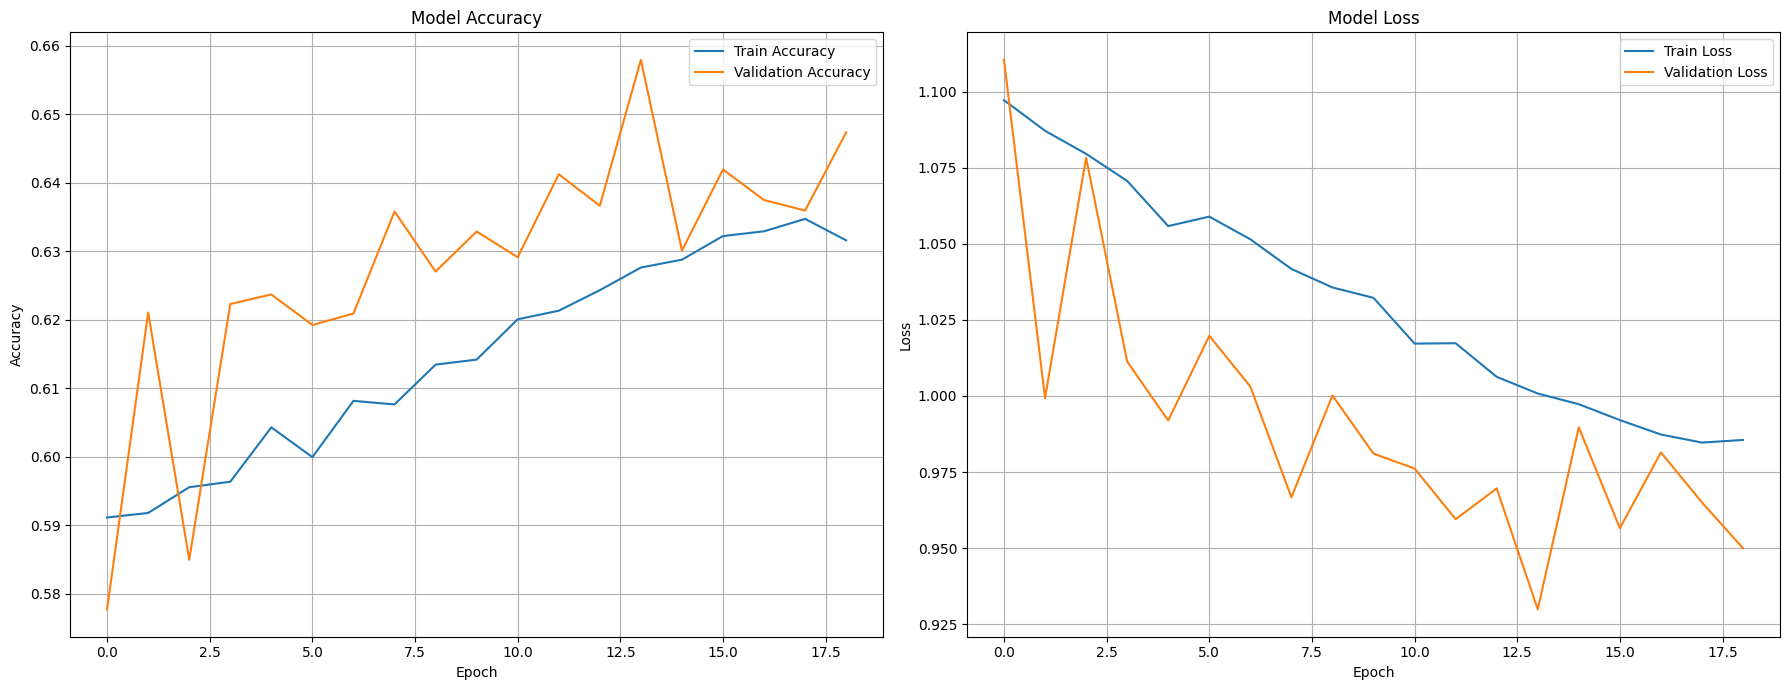

In [48]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(18, 7))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Model Performance Metrics

- **accuracy: 0.6345**  
    This is the training accuracy, indicating that the model correctly classified about 63.45% of the training samples.

- **loss: 0.9807**  
    This is the training loss, representing the error between the model's predictions and the true labels on the training set. Lower values indicate better performance.

- **val_accuracy: 0.6474**  
    This is the validation accuracy, showing that the model correctly classified about 64.74% of the samples in the validation (test) set.

- **val_loss: 0.9500**  
    This is the validation loss, measuring the error on the validation set. Like training loss, lower values are better.

### Interpretation

- The validation accuracy (0.6474) is slightly higher than the training accuracy (0.6345), suggesting that the model generalizes well and is not overfitting.
- Both loss values are similar, indicating consistent performance on both training and validation data.


Note : If validation accuracy is much lower than training accuracy, it may indicate overfitting. If it is much higher, it could suggest underfitting or data issues. In this case, the accuracies are close, which is a good sign.


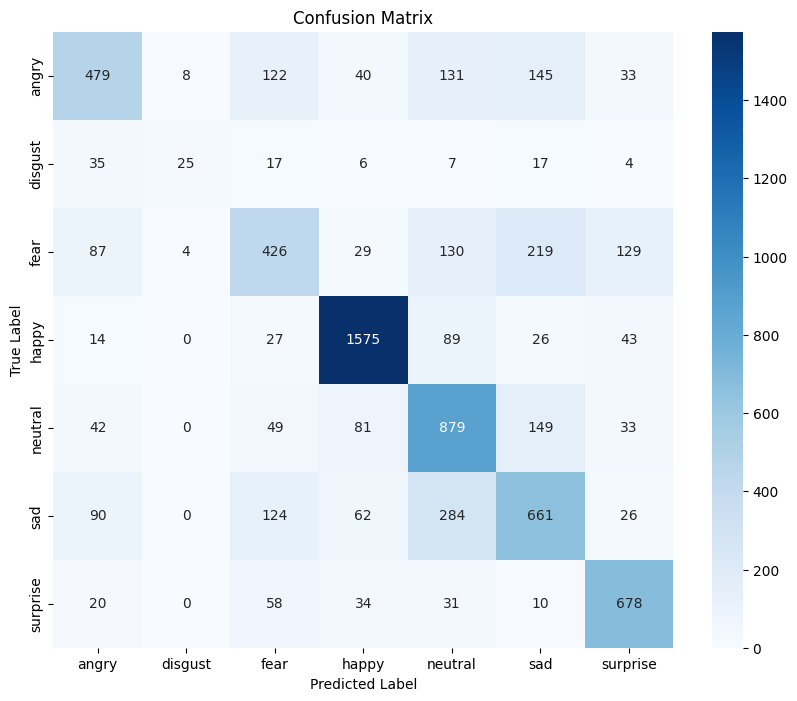

In [52]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels, cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()